### Summary of Findings

I scraped data from the Meetup Website and was able to scrape the title, organization, number RSVPed, and time for 80-90 events (depending on when I scraped the data).

Here were some of my findings when analyzing/visualizing the data:
+ The average number of people RSVPed for a Meetup event was 14.
+ Half of the Meetup events had a number of RSVPs between 4 and 8.
+ There are some words that come up more often than others in the event titles (women, Denver, happy hour, networking, meditation, code). However, the presence of certain words seems to change based on the time of the week the data is scraped. For example, once Friday events were included in the data I scraped, a common word was "poker." "Poker" did not show up at all in the Thursday events. The opposite was true of the word "code."
+ In general, average number of RSVPs was higher when the words "happy hour" or "networking" were included in the event title.
+ On the other hand, the events with "meditation" in the event title had very low relative attendance.

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess


class MUSpider(scrapy.Spider):

    name = "MUS"
    
    # URL(s) to start with.
    start_urls = [
        'https://www.meetup.com/find/events/?allMeetups=true&radius=5&userFreeform=Denver%2C+CO&mcId=z80212&mcName=Denver%2C+CO&eventFilter=all',
    ]

    # Use XPath to parse the response we get.
    def parse(self, response):
        
        # Iterate over every <article> element on the page.
        for event in response.xpath('//*[@class="row event-listing clearfix doc-padding  "]'):
            
  
            yield {

                "meetup_title": event.xpath("div[2]/div/a/span[@itemprop='name']/text()").extract(),
                "time": event.xpath("div[1]/a/time/@datetime").extract(),
                "organization": event.xpath("div[2]/div/div[1]/a/span[@itemprop='name']/text()").extract(),
                "num_attending": event.xpath("div[2]/div/div[2]/div[@class='attendee-count']/text()").extract_first()
              
            }

process = CrawlerProcess({
    'FEED_FORMAT': 'json',         # Store data in JSON format.
    'FEED_URI': 'Meetups22.json',  # Name our storage file.
    'LOG_ENABLED': False          
})

# Start the crawler with our spider.
process.crawl(MUSpider)
process.start()
print('Success!')




Success!


In [2]:
import pandas as pd

firstpage = pd.read_json('Meetups22.json', orient='records')
print(firstpage.shape)
firstpage.head()

(85, 4)


,meetup_title,num_attending,organization,time
0,[Marlena by Julie Buntin],\n21\n\n\nReaders\n\ngoing\n\n,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00]
1,[Tiny Houses and Beer - Tiny House Enthusiasts...,\n30\n\n\nMembers\n\ngoing\n\n,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00]
2,[Drop-in Meditation Class],\n3\n\n\nMeditators\n\ngoing\n\n,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00]
3,[No-Limit Hold Em Cash Game],\n18\n\n\nMembers\n\ngoing\n\n,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00]
4,[Third Wednesday chess],\n8\n\n\nKings and Queens\n\ngoing\n\n,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00]


In [3]:
def pull_numbers(string):
    for s in string.split():
        if s.isdigit():
            int(s)
            return(s)

In [4]:
firstpage["num_attending"] = firstpage["num_attending"].apply(pull_numbers)

In [5]:
firstpage.head(10)

,meetup_title,num_attending,organization,time
0,[Marlena by Julie Buntin],21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00]
1,[Tiny Houses and Beer - Tiny House Enthusiasts...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00]
2,[Drop-in Meditation Class],3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00]
3,[No-Limit Hold Em Cash Game],18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00]
4,[Third Wednesday chess],8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00]
5,[Keys to Wealth Creation],4,[Real Estate Investors & Entrepreneurs Of Colo...,[2019-01-16T17:00:00-07:00]
6,[Oneness Blessing and Meditation],4,[Expand Awareness and Enlighten-Up!],[2019-01-16T17:00:00-07:00]
7,[TRVE Game Night],5,"[Beer, Bands, And Board Games]",[2019-01-16T17:00:00-07:00]
8,"[""the laugh night on earth"" Free Comedy Night ...",39,[Laid-Back Singles Denver-Boulder],[2019-01-16T17:00:00-07:00]
9,[Guided Spanish Meetup at Little Machine Brewery],6,[Denver Spanish Meetup at Little Machine Brewery],[2019-01-16T17:00:00-07:00]


In [6]:
firstpage["meetup_title"].iloc[1]

['Tiny Houses and Beer - Tiny House Enthusiasts Happy Hour']

In [7]:
def list_to_string(lst):
    return lst[0]

In [8]:
firstpage["meetup_title"] = firstpage["meetup_title"].apply(list_to_string)

In [9]:
firstpage.iloc[65:]

,meetup_title,num_attending,organization,time
65,Emerging Filmmakers Project,6,[Colorado Film Industry Meetup],[2019-01-17T18:00:00-07:00]
66,STSP: Friday Morning Walk - Belmar Park,3,[Mile High Ramblers],[2019-01-18T05:00:00-07:00]
67,FREE! Denver Museum of Nature and Science,4,[Lakewood Ladies with Little Ones (playdates f...,[2019-01-18T07:00:00-07:00]
68,Business Development Roundtable Preview,5,[CATS Colorado Arts and Technology Series],[2019-01-18T07:00:00-07:00]
69,Open Studio - working time for artists,3,[Lakewood Arts],[2019-01-18T09:30:00-07:00]
70,Hexacon,5,[The Denver Boardgames Meetup Group],[2019-01-18T10:00:00-07:00]
71,Improve our speaking skills!,3,[Thrillspeakers: A Downtown Denver Toastmaster...,[2019-01-18T10:00:00-07:00]
72,Free Lunchtime Meditation,3,[Meditation & Buddhism in Denver],[2019-01-18T10:15:00-07:00]
73,New! Faculty Club TGIF at LoDo Panera,3,[Malcolm S. Knowles College of Independen Lear...,[2019-01-18T14:30:00-07:00]
74,IT IS THRILLING... Gamblers Choice Jumping Co...,6,[Denver Arts & Food Enthusiasts],[2019-01-18T15:30:00-07:00]


In [10]:
firstpage["num_attending"] = firstpage["num_attending"].apply(int)

In [11]:
firstpage.dtypes

meetup_title     object
num_attending     int64
organization     object
time             object
dtype: object

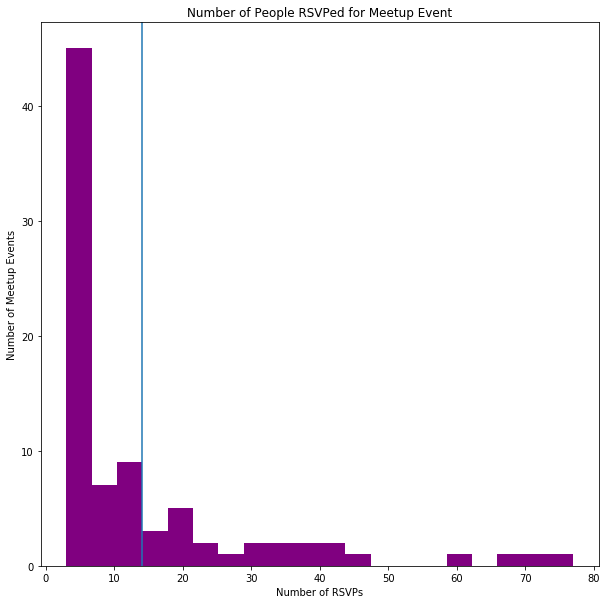

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import statistics

plt.figure(figsize=(10,10))
plt.hist(firstpage["num_attending"], color="purple", bins=20)
plt.title("Number of People RSVPed for Meetup Event")
plt.ylabel("Number of Meetup Events")
plt.xlabel("Number of RSVPs")
plt.axvline(statistics.mean(firstpage["num_attending"]))



In [13]:
firstpage.head(10)

,meetup_title,num_attending,organization,time
0,Marlena by Julie Buntin,21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00]
1,Tiny Houses and Beer - Tiny House Enthusiasts ...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00]
2,Drop-in Meditation Class,3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00]
3,No-Limit Hold Em Cash Game,18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00]
4,Third Wednesday chess,8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00]
5,Keys to Wealth Creation,4,[Real Estate Investors & Entrepreneurs Of Colo...,[2019-01-16T17:00:00-07:00]
6,Oneness Blessing and Meditation,4,[Expand Awareness and Enlighten-Up!],[2019-01-16T17:00:00-07:00]
7,TRVE Game Night,5,"[Beer, Bands, And Board Games]",[2019-01-16T17:00:00-07:00]
8,"""the laugh night on earth"" Free Comedy Night @...",39,[Laid-Back Singles Denver-Boulder],[2019-01-16T17:00:00-07:00]
9,Guided Spanish Meetup at Little Machine Brewery,6,[Denver Spanish Meetup at Little Machine Brewery],[2019-01-16T17:00:00-07:00]


In [14]:
firstpage["Women"] = 0

In [15]:
def word_woman(string):
    if "Women" in string:
        return firstpage["Women"] == 1
    else:
        return firstpage["Women"] == 0

In [16]:
firstpage["Women"] = firstpage["meetup_title"].apply(word_woman)

In [17]:


def word_denver(string):
    if "Denver" in string:
        return firstpage["Denver"] == 1
    else:
        return firstpage["Denver"] == 0
    
def word_code(string):
    if "Code" in string:
        return firstpage["Code"] == 1
    else:
        return firstpage["Code"] == 0

def word_hh(string):
    if "Happy Hour" in string:
        return firstpage["Happy_Hour"] == 1
    else:
        return firstpage["Happy_Hour"] == 0
    
def word_meditation(string):
    if "Meditation" in string:
        return firstpage["Meditation"] == 1
    else:
        return firstpage["Meditation"] == 0
    
def word_networking(string):
    if "Networking" in string:
        return firstpage["Networking"] == 1
    else:
        return firstpage["Networking"] == 0

In [18]:
firstpage["Denver"] = 0
firstpage["Denver"] = firstpage["meetup_title"].apply(word_denver)

firstpage["Code"] = 0
firstpage["Code"] = firstpage["meetup_title"].apply(word_code)

firstpage["Happy_Hour"] = 0
firstpage["Happy_Hour"] = firstpage["meetup_title"].apply(word_hh)

firstpage["Meditation"] = 0
firstpage["Meditation"] = firstpage["meetup_title"].apply(word_meditation)

firstpage["Networking"] = 0
firstpage["Networking"] = firstpage["meetup_title"].apply(word_networking)

In [19]:
firstpage.head(10)

,meetup_title,num_attending,organization,time,Women,Denver,Code,Happy_Hour,Meditation,Networking
0,Marlena by Julie Buntin,21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
1,Tiny Houses and Beer - Tiny House Enthusiasts ...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00],True,True,True,False,True,True
2,Drop-in Meditation Class,3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00],True,True,True,True,False,True
3,No-Limit Hold Em Cash Game,18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
4,Third Wednesday chess,8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
5,Keys to Wealth Creation,4,[Real Estate Investors & Entrepreneurs Of Colo...,[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
6,Oneness Blessing and Meditation,4,[Expand Awareness and Enlighten-Up!],[2019-01-16T17:00:00-07:00],True,True,True,True,False,True
7,TRVE Game Night,5,"[Beer, Bands, And Board Games]",[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
8,"""the laugh night on earth"" Free Comedy Night @...",39,[Laid-Back Singles Denver-Boulder],[2019-01-16T17:00:00-07:00],True,True,True,True,True,True
9,Guided Spanish Meetup at Little Machine Brewery,6,[Denver Spanish Meetup at Little Machine Brewery],[2019-01-16T17:00:00-07:00],True,True,True,True,True,True


In [20]:
q = {False: 1, True: 0}

words = ["Women", "Denver", "Code", "Happy_Hour", "Meditation", "Networking"]

for word in words:
    firstpage[word] = firstpage[word].map(q)

In [21]:
firstpage.head()

,meetup_title,num_attending,organization,time,Women,Denver,Code,Happy_Hour,Meditation,Networking
0,Marlena by Julie Buntin,21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00],0,0,0,0,0,0
1,Tiny Houses and Beer - Tiny House Enthusiasts ...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00],0,0,0,1,0,0
2,Drop-in Meditation Class,3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00],0,0,0,0,1,0
3,No-Limit Hold Em Cash Game,18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00],0,0,0,0,0,0
4,Third Wednesday chess,8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00],0,0,0,0,0,0


Text(0,0.5,'Frequency in Event Titles')

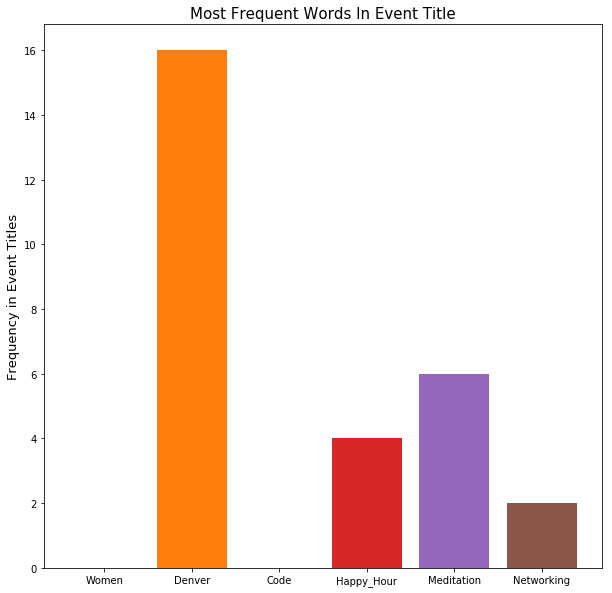

In [22]:
plt.figure(figsize=(10,10))
for col in firstpage.columns[4:]:
    plt.bar(x=col, height=sum(firstpage[col]))
plt.title("Most Frequent Words In Event Title", size=15)
plt.ylabel("Frequency in Event Titles", size=13)

In [23]:
def hot_words(df):
    i = 0
    if df["Women"] == 1:
        i += 1
    if df["Denver"] == 1:
        i += 1
    if df["Code"] == 1:
        i += 1
    if df["Happy_Hour"] == 1:
        i += 1
    if df["Meditation"] == 1:
        i += 1
    if df["Networking"] == 1:
        i += 1
    return i

In [24]:
firstpage["Hot_Words"] = firstpage.apply(hot_words, axis=1)

In [25]:
firstpage.head()

,meetup_title,num_attending,organization,time,Women,Denver,Code,Happy_Hour,Meditation,Networking,Hot_Words
0,Marlena by Julie Buntin,21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00],0,0,0,0,0,0,0
1,Tiny Houses and Beer - Tiny House Enthusiasts ...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00],0,0,0,1,0,0,1
2,Drop-in Meditation Class,3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00],0,0,0,0,1,0,1
3,No-Limit Hold Em Cash Game,18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00],0,0,0,0,0,0,0
4,Third Wednesday chess,8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00],0,0,0,0,0,0,0


In [26]:
firstpage.describe()

,num_attending,Women,Denver,Code,Happy_Hour,Meditation,Networking,Hot_Words
count,85.000000,85.0,85.000000,85.0,85.000000,85.000000,85.000000,85.000000
mean,14.011765,0.0,0.188235,0.0,0.047059,0.070588,0.023529,0.329412
std,16.395044,0.0,0.393220,0.0,0.213021,0.257656,0.152477,0.543100
min,3.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,77.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,3.000000


In [27]:
averages_by_num_of_hot_words = []

for n in [0, 1, 2, 3]:
    avg = sum(firstpage[firstpage["Hot_Words"] == n]["num_attending"])/ (firstpage[firstpage["Hot_Words"] == n].shape[0] + .0001)
    averages_by_num_of_hot_words.append(avg)
    

In [28]:
averages_by_num_of_hot_words

[12.932181470878863, 14.03994384022464, 0.0, 76.992300769923]

Text(0,0.5,'Average Attendance')

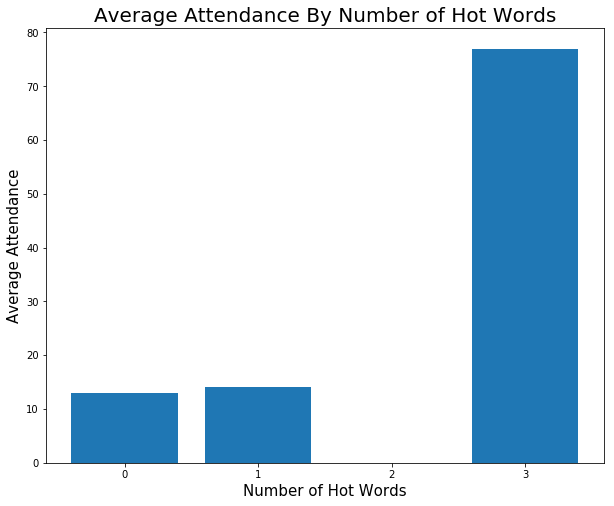

In [29]:
plt.figure(figsize=(10,8))
plt.bar(x=[0, 1, 2, 3], height=averages_by_num_of_hot_words)
plt.xticks([0, 1, 2, 3])
plt.title("Average Attendance By Number of Hot Words", size=20)
plt.xlabel("Number of Hot Words", size=15)
plt.ylabel("Average Attendance", size=15)


In [30]:
n = 10
for col in firstpage.columns[4:10]:

    if sum(firstpage[col]) == 0:
        del firstpage[col]
        n -=1

In [31]:
n

8

In [32]:
with_hot_word_attendance = []
without_hot_word_attendance = []

for col in firstpage.columns[4:n]:
    with_avg = statistics.mean(firstpage[firstpage[col] == 1]["num_attending"]) 
    without_avg = statistics.mean(firstpage[firstpage[col] == 0]["num_attending"])
    with_hot_word_attendance.append(with_avg)
    without_hot_word_attendance.append(without_avg)

In [33]:
firstpage.head()

,meetup_title,num_attending,organization,time,Denver,Happy_Hour,Meditation,Networking,Hot_Words
0,Marlena by Julie Buntin,21,[That Book Club: Denver Chapter],[2019-01-16T17:00:00-07:00],0,0,0,0,0
1,Tiny Houses and Beer - Tiny House Enthusiasts ...,30,[Denver Metro Tiny House Enthusiasts],[2019-01-16T17:00:00-07:00],0,1,0,0,1
2,Drop-in Meditation Class,3,[Meditation & Buddhism in Denver],[2019-01-16T17:00:00-07:00],0,0,1,0,1
3,No-Limit Hold Em Cash Game,18,"[""All In"" Poker Meetup]",[2019-01-16T17:00:00-07:00],0,0,0,0,0
4,Third Wednesday chess,8,[Learn to Play Chess!],[2019-01-16T17:00:00-07:00],0,0,0,0,0


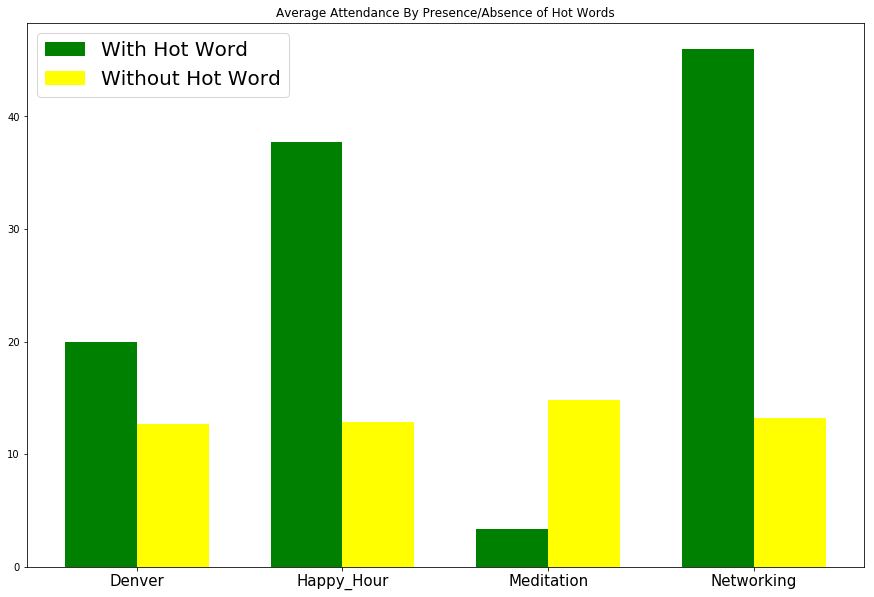

In [36]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))

ind = np.arange(n-4)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, with_hot_word_attendance, width, color='green')


p2 = ax.bar(ind + width, without_hot_word_attendance, width, color='yellow')

ax.set_title('Average Attendance By Presence/Absence of Hot Words')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels((firstpage.columns[4:n]), fontsize=15)
ax.legend((p1[0], p2[0]), ('With Hot Word', 'Without Hot Word'), fontsize=20)
plt.show()
